# Inteligencia artificial avanzada para la ciencia de datos
## Machine Learning

## 1. Naive Bayes

[video](https://www.youtube.com/watch?v=D7KKlC0LOyw)

Formula
$$ P(y∣X)=\frac{P(X∣y)⋅P(y)}{P(X)}​ $$

Donde

- $P(y∣X)$: Probabilidad posterior, probabilidad de la clase y dadas las características X
- $P(X∣y)$: Probabilidad de las características X dada la clase y
- $P(y)$: Probabilidad previa de la clase y
- $P(X)$: Probabilidad marginal o evidencia


Como clasificador la ecuacion queda de la siguiente manera
$$y​=argmax_{y}​P(y)⋅∏_{i=1}^{n}​P(x_{i}​∣y)$$

Donde se evalua la probabilidad de cada una de las clases

[Data set](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test, y_pred)
c=0
for i in range(len(y_pred)):
  if y_pred[i]==y_test[i]:
    c+=1

accuracy=c/len(y_pred)
print (accuracy)


0.9466666666666667


## 2. SVM máquina de vectores de soporte

Las maquinas de vector soporte se basan en la idea de trazar un hyperplano que divide 2 conjunto de datos de la manera mas optima posible, en 2 dimensiones
este hyper plano se asemeja a la ecuacion de la recta.

$$w^{T}x+b=0$$

La distancia al hyperplano es dado por esta ecuacion.

$$d_{i}​=\frac{w^{T}x_{i}​+b}{∣∣w∣∣}​$$



Este que es el caso mas sencillo, se pueden tener problemas con infinidad de hyperplanos

[plano](https://es.wikipedia.org/wiki/M%C3%A1quina_de_vectores_de_soporte#/media/Archivo:Svm_4.JPG)

La ecuacion que describe como se genera el vector w es


Algunos conceptos relacionados
- Hiperplano: Un límite de decisión que separa diferentes clases en el espacio de características y se representa mediante la ecuación wx + b = 0 en la clasificación lineal.
- Vectores de soporte: Los puntos de datos más cercanos al hiperplano, cruciales para determinar el hiperplano y el margen en SVM.
- Margen: La distancia entre el hiperplano y los vectores de soporte. SVM busca maximizar este margen para un mejor rendimiento de la clasificación.
- Núcleo: Una función que asigna los datos a un espacio de mayor dimensión, lo que permite a SVM gestionar datos separables de forma no lineal.
Margen duro: Un hiperplano de margen máximo que separa perfectamente los datos sin errores de clasificación.
- Margen suave: Permite algunos errores de clasificación mediante la introducción de variables de holgura, equilibrando la maximización del margen y las penalizaciones por errores de clasificación cuando los datos no son perfectamente separables.
- C: Un término de regularización que equilibra la maximización del margen y las penalizaciones por errores de clasificación. Un valor C más alto impone una penalización más estricta para los errores de clasificación.
Pérdida de bisagra: Una función de pérdida que penaliza los puntos mal clasificados o las violaciones de margen, y se combina con la regularización en
 SVM. Problema dual: implica resolver los multiplicadores de Lagrange asociados con los vectores de soporte, lo que facilita el truco del kernel y un cálculo eficiente.

[dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


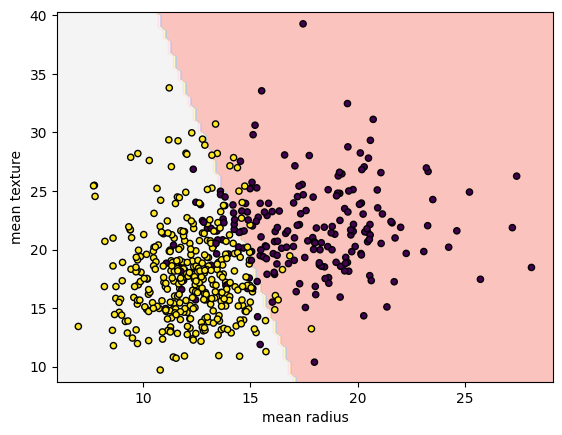

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target
print(cancer.data[:, :])
svm = SVC(kernel="linear", C=1)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()


# Ejercicio de clase

Usando  el dataset de [mnist](mnist) prueba la capacidad de los clasificadores vistos en la clase.

para cada clasificador imprime el accuracy, recall y f1 score, asi tambien la matriz de confucion correspondiente.

comenta paso a paso el desarrollo del programa.


## Load and prepare the mnist dataset



In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset loaded and split successfully.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Dataset loaded and split successfully.
Training data shape: (1437, 64)
Testing data shape: (360, 64)


## Naive bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# Instantiate a GaussianNB model
gnb = GaussianNB()

# Train the GaussianNB model
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = gnb.predict(X_test)

# Calculate accuracy, recall, f1-score, and confusion matrix
accuracy_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Print the results
print("Gaussian Naive Bayes Performance:")
print(f"Accuracy: {accuracy_nb}")
print(f"Recall (macro average): {recall_nb}")
print(f"F1-score (macro average): {f1_nb}")

Gaussian Naive Bayes Performance:
Accuracy: 0.8472222222222222
Recall (macro average): 0.8476479221745045
F1-score (macro average): 0.8437352605469787


### Matriz de confusión

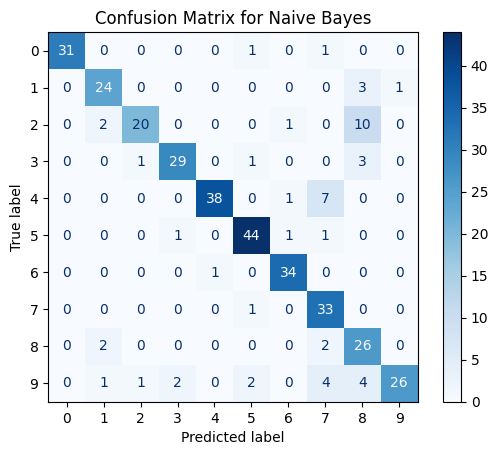

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize the confusion matrix for Naive Bayes
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_nb, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

## SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# Instantiate an SVC model with a linear kernel and C=1
svm = SVC(kernel="linear", C=1)

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm.predict(X_test)

# Calculate accuracy, recall, f1-score, and confusion matrix for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print the results for SVM
print("SVM Performance:")
print(f"Accuracy: {accuracy_svm}")
print(f"Recall (macro average): {recall_svm}")
print(f"F1-score (macro average): {f1_svm}")

SVM Performance:
Accuracy: 0.9777777777777777
Recall (macro average): 0.9781692242114237
F1-score (macro average): 0.9785455500691013


### Matriz de confusión

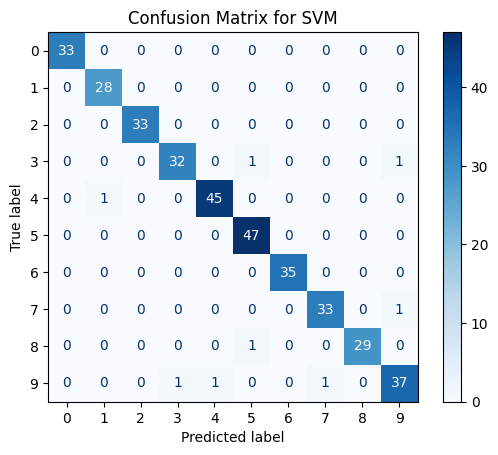

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize the confusion matrix for SVM
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.show()

## Resultados

Naive Bayes: El clasificador Naive Bayes mostró una cantidad significativa de falsos positivos para el dígito 2 (10 instancias predichas como 2, pero que eran de otras clases), y también para el dígito 8 (4 instancias predichas como 8, pero que eran de otras clases).

SVM: El clasificador SVM tuvo menos falsos positivos en general. Los falsos positivos se distribuyeron entre varios dígitos, con un par de instancias para los dígitos 3, 6, 8 y 9, que fueron predichas incorrectamente.

SVM modela límites de decisión más complejos y no asumir independencia de características le da una ventaja sobre Naive Bayes en conjuntos de datos donde las características están correlacionadas, como en el caso de las imágenes de dígitos de MNIST.

### Extra

**Teorema de No Free Launch:**

El Teorema de No Free Launch (NFL) en Machine Learning establece que no existe un algoritmo de aprendizaje universalmente mejor que otros para todos los problemas posibles. En otras palabras, si un algoritmo funciona excepcionalmente bien en un tipo de problema, probablemente tendrá un rendimiento inferior en otro tipo de problema en comparación con un algoritmo diferente.

Este teorema implica que el éxito de un modelo de Machine Learning depende en gran medida de la naturaleza del problema y del conjunto de datos específico. No se puede esperar que un solo algoritmo sea el "mejor" en todas las situaciones. Por lo tanto, la elección del algoritmo adecuado requiere experimentación y consideración de las características del problema y los datos disponibles. Es por eso que probamos diferentes clasificadores como Naive Bayes y SVM para ver cuál se adapta mejor a un conjunto de datos particular, como el de MNIST.